In [1]:
import numpy as np
import pandas as pd
import torch
from torch.nn import Linear
import matplotlib.pyplot as plt
import random

In [149]:
x = np.arange(0, 100)

In [150]:
y = [1.5 * i + random.random() * 10 for i in x]

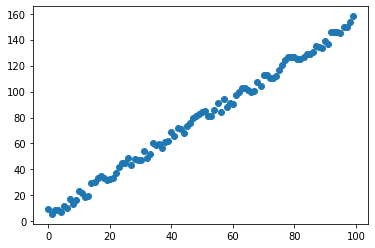

In [151]:
plt.scatter(x, y)

In [152]:
model = Linear(in_features=1, out_features=1)

In [153]:
model

Linear(in_features=1, out_features=1, bias=True)

In [154]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3508]], requires_grad=True),
 Parameter containing:
 tensor([0.5882], requires_grad=True)]

In [155]:
x_tensor = torch.from_numpy(x)
x_tensor = x_tensor.type(torch.float32)

y_tensor = torch.tensor(y)
y_tensor = y_tensor.type(torch.float32)

In [156]:
torch.cuda.is_available()

False

In [157]:
model(torch.tensor([[1.0]]))

tensor([[0.9390]], grad_fn=<AddmmBackward>)

In [158]:
model(x_tensor.view(-1,1))[:5]

tensor([[0.5882],
        [0.9390],
        [1.2898],
        [1.6406],
        [1.9914]], grad_fn=<SliceBackward>)

In [159]:
# untrained LR model

In [160]:
model.weight

Parameter containing:
tensor([[0.3508]], requires_grad=True)

In [161]:
model.bias

Parameter containing:
tensor([0.5882], requires_grad=True)

In [162]:
model.weight.data = torch.tensor([0])
model.weight

Parameter containing:
tensor([0], requires_grad=True)

In [182]:
model = Linear(in_features=1, out_features=1)
model.weight.data = torch.tensor([0.0])
model.bias.data = torch.tensor([0.0])

w = model.weight
b = model.bias

# we need to minimize cost function 
def forward(x):
    return w * x + b

def criterion(yhat, y):
    return torch.mean( (yhat-y)**2 )

lr = 0.0003
for e in range(5000):
    yhat = forward(x_tensor)
    # print(yhat, y_tensor)
    loss = criterion(yhat, y_tensor)
    loss.backward()

    # print(w.grad, b.grad)

    w.data = w.data - lr*w.grad.data
    b.data = b.data - lr*b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()

print(w, b)

Parameter containing:
tensor([1.5273], requires_grad=True) Parameter containing:
tensor([2.9165], requires_grad=True)


In [183]:
list(model.parameters())

[Parameter containing:
 tensor([1.5273], requires_grad=True),
 Parameter containing:
 tensor([2.9165], requires_grad=True)]

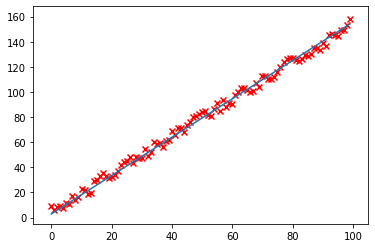

In [194]:
plt.plot(x, forward(x_tensor).detach().numpy())
plt.scatter(x, y, color='r', marker='x')